In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("proyectos.csv",sep=";")

In [3]:
df.head()

,titulo,descripcion,palabras_clave
0,"""Nanotecnología en materiales de construcción-...",Este proyecto incluye dos líneas de trabajo: M...,CEMENTO NANOCELULOSA NANOTUBOS DE CARBONO
1,?Estudio de multicapas aplicado a recubrimient...,ESTUDIO DE COMPORTAMIENTO Y DISEÑO DE MULTICAP...,MULTICAPAS LENTES OFTALMICAS FILTROS
2,?Materiales Magnéticos de Nueva Generación?,Preparación de materiales magnéticos: óxidos e...,MAGNETISMO FERRITAS CINTAS AMORFAS
3,ANALISIS DE SEÑALES Y MODELOS BIOMEDICOS,"En este proyecto, continuación de UBACyT I001,...",ANALISIS DE SEÑALES MODELOS BIOMEDICOS EEG
4,ANALISIS DE SEÑALES Y TEORIA DE ONDITAS,En el proyecto se desarrollarán técnicas matem...,ANÁLISIS DE SEÑALES WAVELETS


In [4]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from difflib import SequenceMatcher

import matplotlib.pyplot as plt
#% matplotlib inline

In [5]:
len(df)

390

In [6]:
from nltk.stem.snowball import SnowballStemmer

# Funciones auxiliares

def get_closest_word(stemmed_word, current_word, new_word):
    if SequenceMatcher(None, stemmed_word, current_word).ratio() > SequenceMatcher(None, stemmed_word, new_word).ratio():
        return current_word
    return new_word

def add_stopwords_from_file(stopwords, file):
    spanish_stemmer = SnowballStemmer('spanish')
    words = []
    with open(file) as f:
        for l in f:
            words.append(l.rstrip('\n'))
    for word in words:
        stopwords.add(word)

def get_frequency(textos):
    spanish_stemmer = SnowballStemmer('spanish')
    texto = " ".join(textos)

    distances = {}
    appearences = {}

    for word in texto.split():
        stemmed_word = spanish_stemmer.stem(word)
        distances[stemmed_word] = get_closest_word(stemmed_word, distances.get(stemmed_word, word), word)
        appearences[stemmed_word] = appearences.get(stemmed_word, 0) + 1

    return {distances[stemmed_word]:appearences[stemmed_word] for stemmed_word in distances}

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Juani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


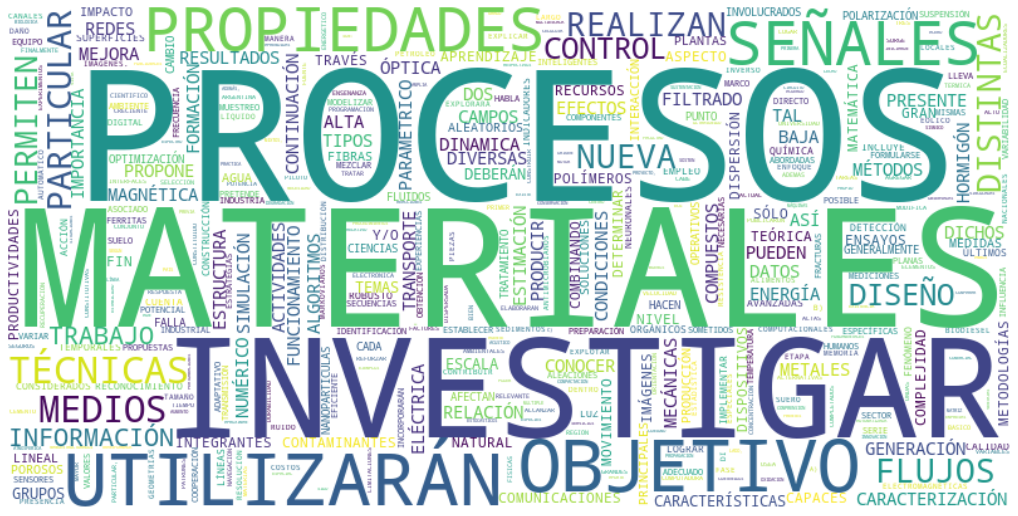

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

stop_words_sp = set(stopwords.words('spanish'))
stop_words_en = set(stopwords.words('english'))
stopwords = stop_words_sp | stop_words_en
stopwords.update(["SISTEMA","ESTUDIO"]) # Acá agrego las palabras que no quiero que aparezcan en el wordcloud
add_stopwords_from_file(stopwords, './stopwords.txt') # stopwords.txt es un archivo con cada stopword en una linea


spanish_stemmer = SnowballStemmer('spanish')

stopwords = set(map(lambda w:spanish_stemmer.stem(w),stopwords)) 

textos = []
for idx in range(len(df)):
    textos.append(str(df.descripcion[idx]).upper() + str(df.titulo[idx]).upper() + str(df.palabras_clave[idx]).upper())

words_frequency = get_frequency(textos) # Genero diccionario para mejorar la visualizacion de la wordcloud
    
filtered_words = dict(filter(lambda k:spanish_stemmer.stem(k[0].lower()) not in stopwords, words_frequency.items())) # Aplico stopwords

# Generate a word cloud image
wordcloud = WordCloud(width=800,height=400, max_words=400, background_color="white").generate_from_frequencies(filtered_words)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(18,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("wordcloud.png")
plt.show()
